<div style="border: 2px solid #e74c3c; padding: 10px; border-radius: 5px; text-align: center; background-color: #fdecea; color: #c0392b; font-weight: bold;">
  Projected Gradient descent
</div>

* [PGD](#pgd)
* [GD vs PGD](#GD-vs-PGD)

In [37]:
# reload auto reloads the module
%reload_ext autoreload
%autoreload 2

# Librairies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# PGD

Nous allons débuter par une implémentation basique du PGD.

À titre d'exemple, optimisons $$f(x)=\frac12\|x\|^2,$$ qui a pour gradient $\nabla f(x)=x.$
Disons que nous voulons optimiser la fonction à l'intérieur d'un sous-espace affine. Rappelons que les sous-espaces affines sont des ensembles convexes. Ci-dessous, nous choisissons un sous-espace affine de faible dimension $b+U$ et définissons l'opérateur de projection linéaire correspondant.

### Sous-espace affine

Un sous-espace affine est un ensemble de points qui peut être décrit comme une translation d'un sous-espace vectoriel. Autrement dit, si \( A \) est un point dans l'espace \( E \) et \( F \) est un sous-espace vectoriel de \( E \), alors le sous-espace affine $( \mathcal{F} )$ passant par \( A \) et de direction \( F \) est défini par :

$$
\mathcal{F} = A + F = \{ A + u \mid u \in F \}
$$

### Projection sur un sous-espace affine

Pour projeter un point \( x \) sur un sous-espace affine $( \mathcal{F} )$, nous devons d'abord identifier la direction \( F \) du sous-espace affine et un point \( A \) appartenant à $( \mathcal{F} )$. La projection de \( x \) sur $( \mathcal{F} )$ peut être calculée en deux étapes :

1. **Translation** : Translatez le point \( x \) et le sous-espace affine $( \mathcal{F} )$ de sorte que \( A \) soit à l'origine. Cela revient à travailler avec le sous-espace vectoriel \( F \).

2. **Projection** : Projetez le point \( x - A \) sur le sous-espace vectoriel \( F \) en utilisant la projection orthogonale.

3. **Re-translation** : Translatez le point projeté pour revenir à la position originale.

### Formule de projection

Soit \( P_F \) l'opérateur de projection orthogonale sur le sous-espace vectoriel \( F \). La projection de \( x \) sur le sous-espace affine \( \mathcal{F} \) est donnée par :

$$
P_{\mathcal{F}}(x) = A + P_F(x - A)
$$

In [31]:
def gradient_descent(init, steps, grad, proj=lambda x: x):
    """Projected gradient descent and GD.
    
    Inputs:
        initial: starting point
        steps: list of scalar step sizes
        grad: function mapping points to gradients
        proj (optional): function mapping points to points
        
    Returns:
        List of all points computed by projected gradient descent.
    """
    xs = [init]
    for step in steps:
        xs.append(proj(xs[-1] - step * grad(xs[-1])))
    return xs

In [3]:
from utils import error_plot

In [4]:
def quadratic(x):
    return 0.5*x.dot(x)

def quadratic_gradient(x):
    return x

In [5]:
U = np.linalg.qr(np.random.normal(0, 1, (1000, 100)))[0]
b = np.random.normal(0, 1, 1000)

def proj(x):
    """Projection of x onto an affine subspace"""
    return b + U.dot(U.T).dot(x-b)

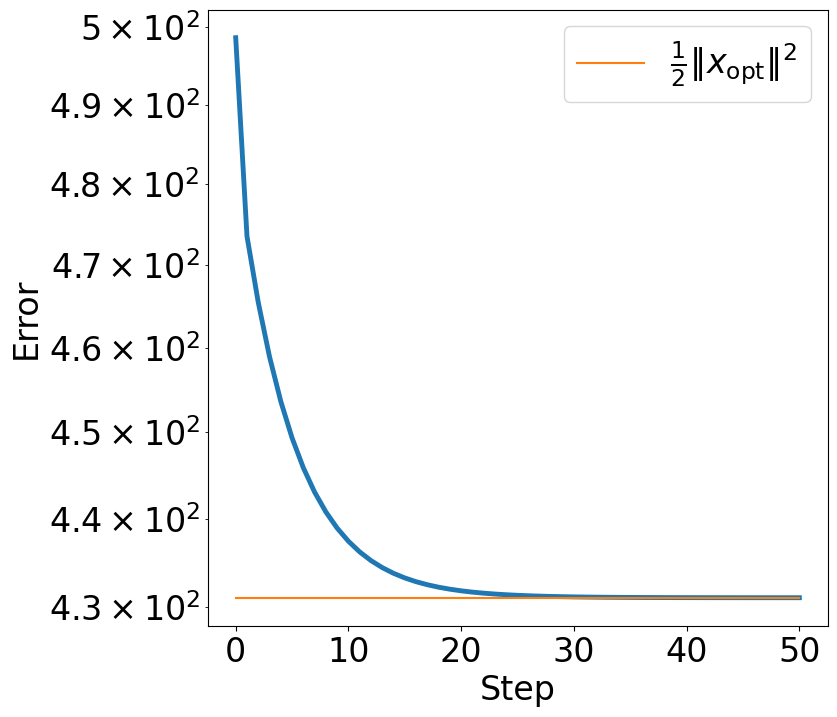

In [9]:
x0 = np.random.normal(0, 1, (1000))
xs = gradient_descent(x0, [0.1]*50, quadratic_gradient, proj)
# La solution optimale est la projection de l'origine sur l'espace affine
# le minimum global de x2 est 0
# projection de 0 dans l'espace est le x_opt 
x_opt = proj(0)
# Calcul du f(x_opt)
error_plot([quadratic(x) for x in xs])
plt.plot(range(len(xs)), [quadratic(x_opt)]*len(xs),
        label='$\\frac{1}{2}|\!|x_{\mathrm{opt}}|\!|^2$')
plt.legend()
plt.show()

A partir de 25 itérations, le PDG a convergé.

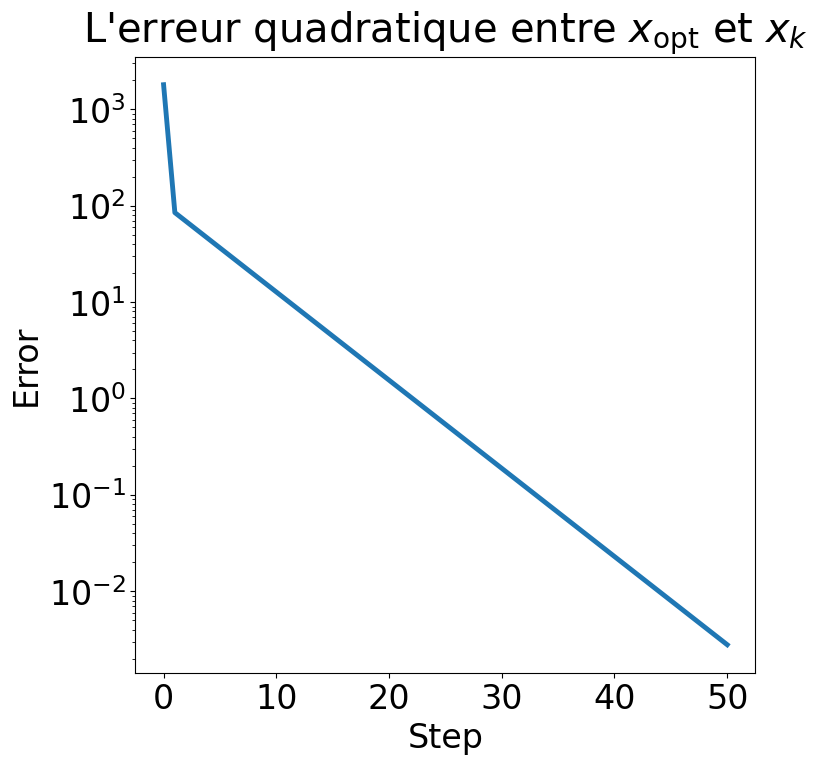

In [14]:
error_plot([np.linalg.norm(x_opt-x)**2 for x in xs])
plt.title("L'erreur quadratique entre $x_{\mathrm{opt}}$ et $x_k$")
plt.show()

# GD vs PGD 

Nous allons comparer la **descente de gradient** vs le **projected gradient descent** sur un problème de regression ridge. Pour rappel un problème de regression Ridge se formule ainsi :

**La régression ridge** est une technique de régularisation utilisée dans les modèles de régression linéaire pour prévenir le surapprentissage (overfitting). Elle ajoute une pénalité à la somme des carrés des coefficients de régression, ce qui contraint ces coefficients à rester petits. Cela permet d'améliorer la généralisation du modèle sur des données nouvelles.

$$
\hat{\beta} = \underset{\beta}{\mathrm{argmin}} \left\{ \sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \beta)^2 + \lambda \|\beta\|^2 \right\}
$$

- $(\hat{\beta})$ : Les coefficients estimés de la régression ridge.
- $(y_i)$ : La valeur cible pour l'observation (i).
- $(\mathbf{x}_i)$ : Le vecteur de caractéristiques pour l'observation (i).
- $(\beta)$ : Le vecteur des coefficients de régression.
- $(\lambda)$ : Le paramètre de régularisation qui contrôle la pénalité sur la taille des coefficients.
- $(|\beta|^2)$ : La norme L2 des coefficients, c'est-à-dire la somme des carrés des coefficients.

En ajoutant cette pénalité, la régression ridge réduit la variance du modèle, ce qui peut améliorer ses performances sur des données de test.

**Réglage du paramètre $(\lambda)$**

▪ Quand lambda est proche de zéro, on s’approche de la solution classique, non pénalisée.

▪ Quand lambda est infini, la pénalisation est telle que tous les paramètres sont nuls.

▪ En augmentant lambda, on augmente le **biais** de la solution, mais on diminue la **variance**.

La régression ridge permet donc de contourner les problèmes de **colinéarité** (variables explicatives très fortement corrélées entre elles) dans un contexte où le nombre de variables explicatives en entrée du problème est élevé.

La principale faiblesse de cette méthode est liée aux difficultés d’interprétation car, sans sélection, toutes les variables sont concernées dans le modèle.

La solution optimale au problème d'optimisation :

$$x_{\mathrm{opt}}=(A^\top A + \alpha I)^{-1}A^\top$$

## Données

Nous allons utiliser une base de données disponible sur sklearn. Il s'agit d'un problème de prédiction des prix d'un appartement. 

Supposons que nous voulons nous assurer que toutes les variables explicatives aient un effet positif sur le prix de l'appartement. (i.e tous les coefficients de la regression linéaire soient positifs.)

In [21]:
california = fetch_california_housing()
X = california.data
y = california.target
print(X.shape, y.shape)

(20640, 8) (20640,)


8 variables et 20640 observations.

In [22]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [23]:
# Standardisons les données
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Apprentissage

In [38]:
from utils import gradient_descent, projected_gradient_descent

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Paramètres de l'apprentissage
alpha = 1.0  
learning_rate = 0.01
iterations = 1000

In [39]:
## Apprentissage
## GD
theta_gd, losses_gd = gradient_descent(X_train, y_train, alpha, learning_rate, iterations)


In [40]:
# Apprentissage
# PGD

theta_pgd, losses_pgd = projected_gradient_descent(X_train, y_train, alpha, learning_rate, iterations)

In [50]:
A = X_train.T @ X_train + alpha * np.eye(X_train.shape[1])
b = X_train.T @ y_train
theta_optimal = np.linalg.inv(A) @ b

In [54]:
theta_gd

array([ 0.8313254 ,  0.17395944, -0.12652335,  0.1544608 ,  0.01810858,
       -0.03647481, -0.48680365, -0.46318617])

In [55]:
theta_pgd

array([0.8368201 , 0.22913536, 0.        , 0.02635669, 0.03661094,
       0.        , 0.        , 0.        ])

In [53]:
theta_optimal

array([ 0.85985331,  0.11705383, -0.30006704,  0.36773335, -0.00115538,
       -0.03252646, -0.90274966, -0.88781015])

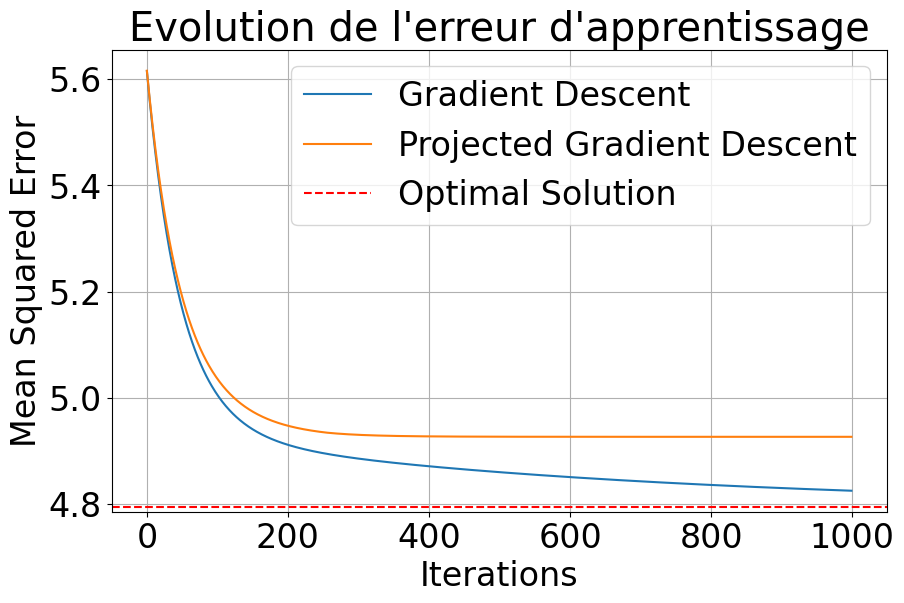

In [57]:
## Courbes de convergence
plt.figure(figsize=(10, 6))
plt.plot(losses_gd, label='Gradient Descent')
plt.plot(losses_pgd, label='Projected Gradient Descent')
plt.axhline(y=mean_squared_error(y_train, X_train @ theta_optimal), color='r', linestyle='--', label='Optimal Solution')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title("Evolution de l'erreur d'apprentissage")
plt.legend()
plt.grid(True)
plt.show()

In [89]:
theta_gd

array([ 0.8313254 ,  0.17395944, -0.12652335,  0.1544608 ,  0.01810858,
       -0.03647481, -0.48680365, -0.46318617])

In [90]:
theta_pgd

array([0.8368201 , 0.22913536, 0.        , 0.02635669, 0.03661094,
       0.        , 0.        , 0.        ])

La descente de gradient classique n'a pas respecté notre condition (tous les coefficients ne sont pas positifs).

La descente de gradient n'est pas adapté lorsqu'on veut faire de l'optimisation sous contraintes.

In [80]:
## Prédiction
y_pred_gd = X_test @ theta_gd
y_pred_pgd = X_test @ theta_pgd

In [81]:
mse_gd = mean_squared_error(y_test, y_pred_gd)
mse_pgd = mean_squared_error(y_test, y_pred_pgd)

print("Gradient Descent MSE:", mse_gd)
print("Projected Gradient Descent MSE:", mse_pgd)

Gradient Descent MSE: 4.8554429661847145
Projected Gradient Descent MSE: 4.8554429661847145
